In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df_test = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/Linear_reg_v3.xlsx',sheet_name ='test')
df_train = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/Linear_reg_v3.xlsx',sheet_name ='train')
df_test_sec = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/Linear_reg_v2.xlsx',sheet_name ='test_sec')

In [4]:
df_train.head()

,S_no,variance,cell_no,cycle,log_variance,log_cycle
0,20,0.001796,b2c0,300,-2.745694,2.477121
1,38,0.000364,b2c41,429,-3.438899,2.632457
2,21,0.000321,b2c2,438,-3.493495,2.641474
3,22,0.000445,b2c4,444,-3.351640,2.647383
4,37,0.000312,b2c39,459,-3.505845,2.661813


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S_no          41 non-null     int64  
 1   variance      41 non-null     float64
 2   cell_no       41 non-null     object 
 3   cycle         41 non-null     int64  
 4   log_variance  41 non-null     float64
 5   log_cycle     41 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.0+ KB


In [6]:
df_train.nunique()

S_no            41
variance        41
cell_no         41
cycle           38
log_variance    41
log_cycle       38
dtype: int64

In [7]:
df_train.describe()

,S_no,variance,cycle,log_variance,log_cycle
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,20.000000,0.000298,673.756098,-3.657590,2.793970
std,11.979149,0.000280,327.143530,0.372680,0.163581
min,0.000000,0.000010,300.000000,-5.000000,2.477121
25%,10.000000,0.000154,477.000000,-3.812479,2.678518
50%,20.000000,0.000240,527.000000,-3.619789,2.721811
75%,30.000000,0.000364,788.000000,-3.438899,2.896526
max,40.000000,0.001796,2160.000000,-2.745694,3.334454


In [136]:
np.median(df_train['cycle'])

527.0

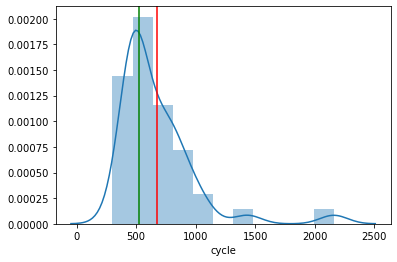

In [8]:
sns.distplot(df_train['cycle'])
plt.axvline(df_train['cycle'].mean(),color = 'r')
plt.axvline(df_train['cycle'].median(),color = 'g')

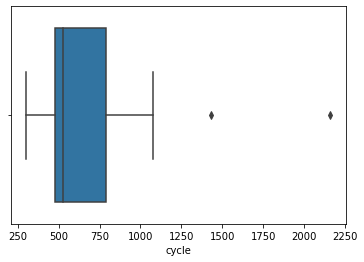

In [18]:
#Outlier 
sns.boxplot(df_train['cycle'])

In [12]:
#OutLier Selection:
Q1 = np.percentile(df_train['cycle'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_train['cycle'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

percentile25 = df_train['cycle'].quantile(0.25)
percentile75 = df_train['cycle'].quantile(0.75)
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
df_train[df_train['cycle'] > upper_limit]
#df_train[df_train['cycle'] < lower_limit]

,S_no,variance,cell_no,cycle,log_variance,log_cycle
39,1,0.000036,b1c3,1434,-4.443697,3.156549
40,0,0.000010,b1c1,2160,-5.000000,3.334454


In [140]:
df_test.head()

,variance,cell_no,cycle,log_variance
0,0.000380,b1c44,616,-3.420216
1,0.000279,b2c22,513,-3.554396
2,0.000010,b1c1,2160,-5.000000
3,0.000248,b2c30,481,-3.605548
4,0.000300,b2c37,478,-3.522879


In [141]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   variance      41 non-null     float64
 1   cell_no       41 non-null     object 
 2   cycle         41 non-null     int64  
 3   log_variance  41 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ KB


In [142]:
df_test.nunique()

variance        41
cell_no         41
cycle           40
log_variance    41
dtype: int64

In [143]:
df_test.describe()

,variance,cycle,log_variance
count,41.000000,41.000000,41.000000
mean,0.000240,715.195122,-3.729284
std,0.000147,341.172040,0.364739
min,0.000010,429.000000,-5.000000
25%,0.000094,483.000000,-4.026872
50%,0.000224,617.000000,-3.649752
75%,0.000345,854.000000,-3.462181
max,0.000653,2160.000000,-3.185087


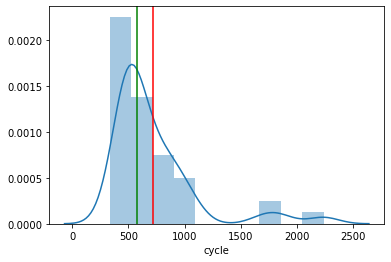

In [14]:
sns.distplot(df_test['cycle'])
plt.axvline(df_test['cycle'].mean(),color = 'r')
plt.axvline(df_test['cycle'].median(),color = 'g')

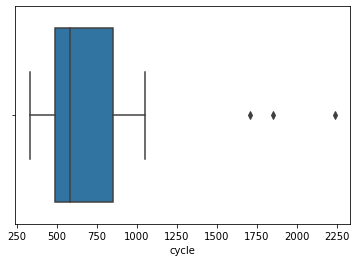

In [19]:
#Outlier 
sns.boxplot(df_test['cycle']) #

In [16]:
#OutLier Selection:
Q1 = np.percentile(df_test['cycle'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_test['cycle'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

percentile25 = df_test['cycle'].quantile(0.25)
percentile75 = df_test['cycle'].quantile(0.75)
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
df_test[df_test['cycle'] > upper_limit]
#df_train[df_train['cycle'] < lower_limit]

,S_no,variance,cell_no,cycle,log_variance,log_cycle
39,2,0.000023,b1c4,1709,-4.638272,3.232742
40,0,0.000010,b1c0,1852,-5.000000,3.267641
41,1,0.000018,b1c2,2237,-4.744727,3.349666


In [100]:
df_test_sec.head()

,S_no,cell_no,variance,cycle,log_variance,log_cycle
0,0,b3c0,0.000059,1009,-4.229148,3.003891
1,1,b3c1,0.000056,1063,-4.251812,3.026533
2,2,b3c3,0.000076,1115,-4.119186,3.047275
3,3,b3c4,0.000064,1048,-4.193820,3.020361
4,4,b3c5,0.000080,828,-4.096910,2.918030


In [101]:
df_test_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S_no          40 non-null     int64  
 1   cell_no       40 non-null     object 
 2   variance      40 non-null     float64
 3   cycle         40 non-null     int64  
 4   log_variance  40 non-null     float64
 5   log_cycle     40 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.0+ KB


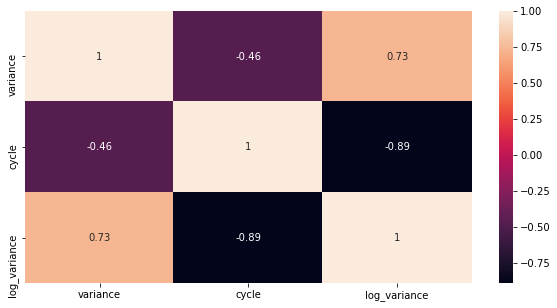

In [144]:
train = df_train.corr()
plt.figure(figsize=(10,5))
sns.heatmap(train, annot=True)
plt.show()

In [145]:
train

,variance,cycle,log_variance
variance,1.000000,-0.464374,0.734190
cycle,-0.464374,1.000000,-0.891946
log_variance,0.734190,-0.891946,1.000000


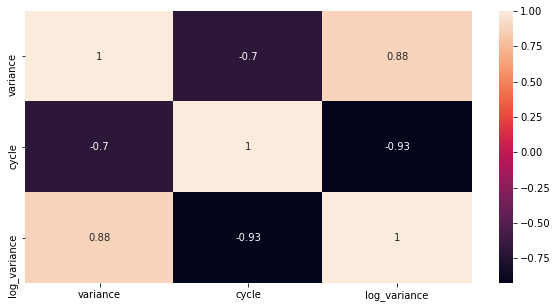

In [147]:
test = df_test.corr()
plt.figure(figsize=(10,5))
sns.heatmap(test, annot=True)
plt.show()

In [105]:
test

,S_no,variance,cycle,log_variance,log_cycle
S_no,1.000000,0.266152,-0.696863,0.448436,-0.702605
variance,0.266152,1.000000,-0.641012,0.878547,-0.704174
cycle,-0.696863,-0.641012,1.000000,-0.843500,0.990593
log_variance,0.448436,0.878547,-0.843500,1.000000,-0.862782
log_cycle,-0.702605,-0.704174,0.990593,-0.862782,1.000000


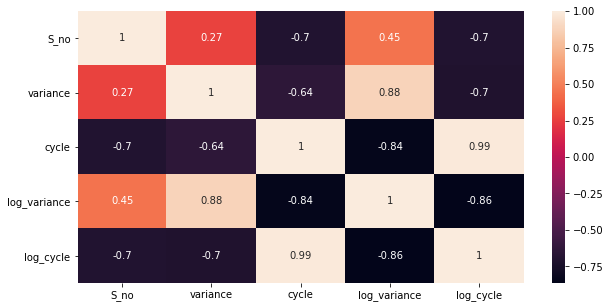

In [106]:
test_sec = df_test_sec.corr()
plt.figure(figsize=(10,5))
sns.heatmap(test, annot=True)
plt.show()

In [107]:
test_sec

,S_no,variance,cycle,log_variance,log_cycle
S_no,1.000000,-0.117500,0.096824,-0.167105,0.067706
variance,-0.117500,1.000000,-0.568491,0.912092,-0.674177
cycle,0.096824,-0.568491,1.000000,-0.739278,0.982545
log_variance,-0.167105,0.912092,-0.739278,1.000000,-0.802834
log_cycle,0.067706,-0.674177,0.982545,-0.802834,1.000000


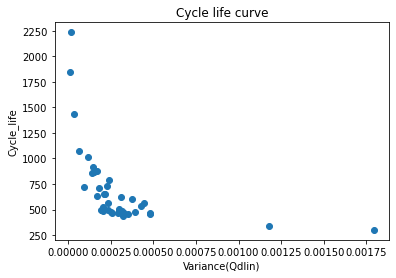

In [148]:
plt.scatter((df_train['variance']),df_train['cycle'])
plt.xlabel('Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

In [2]:
plt.scatter((df_train['log_variance']),df_train['cycle'])
#plt.plot((df_train['log_variance']),df_train['log_cycle'])
sns.regplot((df_train['log_variance']),df_train['cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('cycle')
plt.title('Cycle life curve')
plt.show()

NameError: name 'df_train' is not defined

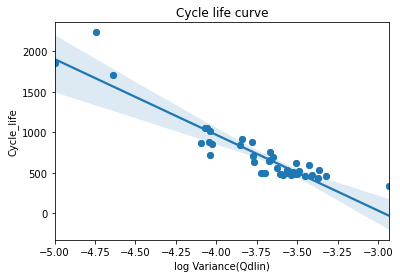

In [36]:
plt.scatter((df_test['log_variance']),df_test['cycle'])
sns.regplot((df_test['log_variance']),df_test['cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

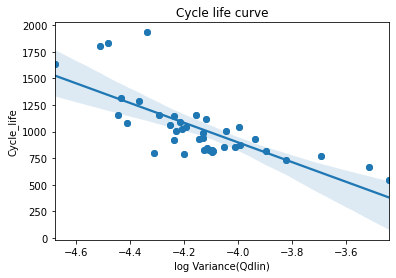

In [35]:
plt.scatter((df_test_sec['log_variance']),df_test_sec['cycle'])
sns.regplot((df_test_sec['log_variance']),df_test_sec['cycle'])
plt.xlabel('log Variance(Qdlin)')
plt.ylabel('Cycle_life')
plt.title('Cycle life curve')
plt.show()

In [151]:
#Check all the 4 assumption of linear regression:
    #a.Linearity
    #b.No autocorrelation
    #c.Multicollinearity
    #d.Homoskedasticity - WIP
#Calcuclate R square
#Sort the data in order
#Sampling
#Biasing
#SKewness
#box plot to see the outlair 

#linear regression:
from sklearn.linear_model import LinearRegression

In [40]:
X_train =df_train['log_variance'].values.reshape(-1,1) 
y_train =df_train['cycle'].values.reshape(-1,1) #Target Variable
X_test = df_test['log_variance'].values.reshape(-1,1)
y_test =df_test['cycle'].values.reshape(-1,1)
X_test_sec=df_test_sec['log_variance'].values.reshape(-1,1)
y_test_sec=df_test_sec['cycle'].values.reshape(-1,1)

In [153]:
linreg =LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [154]:
linreg.fit(X_train,y_train)

LinearRegression()

In [155]:
y_pred_train = linreg.predict(X_train)

In [156]:
y_pred = linreg.predict(X_test)

In [78]:
y_pred_sec = linreg.predict(X_test_sec)

In [57]:
from sklearn import metrics
#MSE
metrics.mean_squared_error(y_test,y_pred)

30891.037839224915

In [58]:
#Mean absolute error
metrics.mean_absolute_error(y_test,y_pred)

123.70962646815961

In [59]:
metrics.mean_absolute_error(y_test,y_pred)

123.70962646815961

In [60]:
# Root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

175.75846448812902

In [61]:
#Relative error:Mean absolute percentage error
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [62]:
MAPE(y_test,y_pred)

19.252815700922234

In [157]:
def Matrix(y_test,y_pred):
    import pandas as pd
    from sklearn import metrics
    x = []
    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
    x.extend([MSE,MAE,RMSE,MAPE])
    df = pd.DataFrame(x)
    df1 = df.transpose()
    df1.columns = ['MSE','MAE','RMSE','MAPE']
    return(df1)

In [158]:
Matrix(y_test,y_pred)

,MSE,MAE,RMSE,MAPE
0,16661.43968,96.584499,129.079199,14.368404


In [159]:
Matrix(y_train,y_pred_train)

,MSE,MAE,RMSE,MAPE
0,28762.874681,127.140692,169.596211,22.815503


In [163]:
r2_score(y_train,y_pred_train) #41

0.7955668886242133

In [164]:
linreg.score(X_train,y_train)

0.7955668886242133

In [69]:
Matrix(X_test_sec,y_pred_sec)

,MSE,MAE,RMSE,MAPE
0,1.072563e+06,1021.733366,1035.646199,24494.401061


NameError: name 'y_pred' is not defined

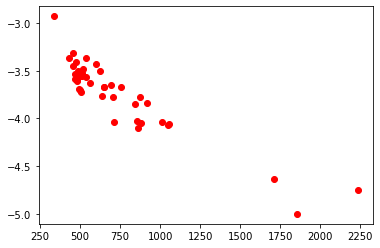

In [41]:
plt.scatter(y_test,df_test['log_variance'],color='r')
plt.scatter(y_pred,df_test['log_variance'],color='g')
plt.xlabel('y')
plt.ylabel('X')
plt.title('Cycle life Prediction curve')
plt.show()

In [160]:
linreg.score(X_test,y_test)

0.8532799299851489

In [161]:
from sklearn.metrics import r2_score

In [162]:
r2_score(y_test,y_pred)#43

0.8532799299851489

In [26]:
from sklearn.linear_model import Lasso

In [27]:
lasso_reg = Lasso(normalize=True)

In [28]:
lasso_reg.fit(X_train,y_train)

Lasso(normalize=True)

In [29]:
y_pred_lass =lasso_reg.predict(X_test)

In [30]:
y_pred_lass

array([1583.95158802, 1411.69342665, 1339.8572547 ,  753.6433307 ,
        949.96298451,  940.02771495,  974.54549219,  672.80277106,
        482.36764913,  936.78942361,  927.28386437,  810.54315518,
        800.25920934,  758.86119645,  684.82068026,  755.37231733,
        688.93872063,  574.75665837,  956.77869598,  684.82068026,
        521.01313381,   50.12788165,  186.83849752,  640.62016461,
        657.50908981,  450.05937388,  571.03518126,  590.13394989,
        721.0472809 ,  608.45631476,  704.55348495,  508.80043406,
        587.1885745 ,  642.974092  ,  562.83072179,  708.96052115,
        614.82748708,  596.11502247,  611.62458761,  630.25538512,
        539.5115499 ,  483.05157566,  933.58652414])

In [40]:
def Matrix(y_test,y_pred):
    import pandas as pd
    from sklearn import metrics
    x = []
    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
    x.extend([MSE,MAE,RMSE,MAPE])
    df = pd.DataFrame(x)
    df1 = df.transpose()
    df1.columns = ['MSE','MAE','RMSE','MAPE']
    return(df1)

In [107]:
y_pred_lass

array([1705.61281574, 1509.39509145, 1427.56715326,  759.81613816,
        983.44209235,  972.12491604, 1011.44380603,  667.73138283,
        450.80844604,  968.43620747,  957.60851032,  824.63021712,
        812.91586679,  765.75976216,  681.42087525,  761.78561131,
        686.11169804,  556.04793658,  991.20580807,  681.42087525,
        494.82917051,  -41.55199045,  114.17384407,  631.07246491,
        650.3104879 ,  414.00637992,  551.80883543,  573.56407122,
        722.68627063,  594.43491246,  703.89833583,  480.91779392,
        570.20902057,  633.75380246,  542.46320934,  708.91835117,
        601.69225762,  580.37705727,  598.04386361,  619.2660377 ,
        515.90055011,  451.58750061,  964.78781346])

In [32]:
y_pred_lasso_final = []
for i in y_pred_lass:
    y_pred_lasso_final.append([i])

In [33]:
Matrix(y_test,y_pred_lasso_final)

,MSE,MAE,RMSE,MAPE
0,32285.016174,124.772802,179.680317,18.940249


In [34]:
lasso_reg.score(X_test,y_test)

0.7890122426231544

In [44]:
y_pred_lasso_final

[[1705.6128157391531],
 [1509.3950914532306],
 [1427.5671532596803],
 [759.8161381643154],
 [983.4420923507055],
 [972.1249160403654],
 [1011.44380603225],
 [667.7313828293054],
 [450.8084460448272],
 [968.4362074667793],
 [957.6085103193291],
 [824.6302171233428],
 [812.9158667872334],
 [765.7597621625455],
 [681.4208752484451],
 [761.7856113062576],
 [686.1116980417005],
 [556.0479365787269],
 [991.2058080666166],
 [681.4208752484451],
 [494.8291705147267],
 [-41.551990446536365],
 [114.17384407100462],
 [631.0724649134222],
 [650.3104879048155],
 [414.006379920334],
 [551.8088354339584],
 [573.5640712200707],
 [722.6862706345396],
 [594.4349124639152],
 [703.8983358269852],
 [480.9177939203987],
 [570.2090205745926],
 [633.7538024557998],
 [542.4632093427435],
 [708.918351167164],
 [601.6922576173856],
 [580.3770572672888],
 [598.0438636056842],
 [619.2660376964968],
 [515.9005501130218],
 [451.58750060909597],
 [964.7878134550779]]

In [42]:
# Root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,y_pred_lass))

164.61497447835646

In [229]:
Matrix(y_test,y_pred)

,MSE,MAE,RMSE,MAPE
0,26711.242997,117.590365,163.435746,20.123154


In [35]:
from sklearn.linear_model import ElasticNet

In [36]:
model = ElasticNet(alpha=4.45, l1_ratio= 0.99)

In [37]:
model.fit(X_train,y_train)

ElasticNet(alpha=4.45, l1_ratio=0.99)

In [38]:
y_pred_elastic =model.predict(X_test)

In [39]:
y_pred_elastic_final = []
for i in y_pred_elastic:
    y_pred_elastic_final.append([i])
    

In [40]:
Matrix(y_test,y_pred_elastic_final)

,MSE,MAE,RMSE,MAPE
0,50354.584889,139.731507,224.398273,18.969315


In [41]:
model.score(X_test,y_test)

0.6709247137396337

In [487]:
y_pred = linreg.predict(X_test)

In [500]:
np.mean(np.abs((y_test - y_pred_elastic_final)/y_test))*100

-7.034231765245025

In [548]:
Matrix(y_test,y_pred_elastic_final)

,MSE,MAE,RMSE,MAPE
0,26920.193542,117.956065,164.073744,20.042486


In [231]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [232]:
MAPE(y_test,y_pred_elastic)

57.19223384073685

In [235]:
y_pred

array([[1728.96367441],
       [1528.30555422],
       [1444.62585445],
       [ 761.76367197],
       [ 990.45026875],
       [ 978.87698538],
       [1019.08565961],
       [ 667.59504388],
       [ 445.76315341],
       [ 975.10480155],
       [ 964.03207423],
       [ 828.04448984],
       [ 816.06504443],
       [ 767.84179984],
       [ 681.59432873],
       [ 763.77771418],
       [ 686.39130458],
       [ 553.38420761],
       [ 998.38967691],
       [ 681.59432873],
       [ 490.78006436],
       [ -57.73937168],
       [ 101.51052959],
       [ 630.10653674],
       [ 649.7799151 ],
       [ 408.12825863],
       [ 549.04917585],
       [ 571.29673138],
       [ 723.79355766],
       [ 592.63987857],
       [ 704.58045296],
       [ 476.55387411],
       [ 567.86575613],
       [ 632.8485528 ],
       [ 539.49205877],
       [ 709.71407096],
       [ 600.06145703],
       [ 578.26389491],
       [ 596.33050007],
       [ 618.03293075],
       [ 512.32828808],
       [ 446.559

In [234]:
y_pred_elastic

array([1728.96268373, 1528.30475192, 1444.62513072,  761.76358935,
        990.44997142,  978.87669892, 1019.0853354 ,  667.59504966,
        445.76336746,  975.10451862,  964.0318017 ,  828.04434499,
        816.06491082,  767.84171151,  681.59432137,  763.77762966,
        686.39129271,  553.38432062,  998.38937212,  681.59432137,
        490.78023615,  -57.73868491,  101.51106685,  630.10657772,
        649.77993761,  408.12850801,  549.04929293,  571.29682757,
        723.79351068,  592.63995473,  704.58042402,  476.55405925,
        567.86585554,  632.84859121,  539.49218483,  709.7140372 ,
        600.06152622,  578.26398457,  596.33057276,  618.03298307,
        512.32843964,  446.56005124,  971.37356517])

In [290]:
Matrix(y_test,y_pred_elastic_final)

,MSE,MAE,RMSE,MAPE
0,28209.745096,119.828387,167.957569,19.629482


In [217]:
y_pred_elastic

array([1728.96268373, 1528.30475192, 1444.62513072,  761.76358935,
        990.44997142,  978.87669892, 1019.0853354 ,  667.59504966,
        445.76336746,  975.10451862,  964.0318017 ,  828.04434499,
        816.06491082,  767.84171151,  681.59432137,  763.77762966,
        686.39129271,  553.38432062,  998.38937212,  681.59432137,
        490.78023615,  -57.73868491,  101.51106685,  630.10657772,
        649.77993761,  408.12850801,  549.04929293,  571.29682757,
        723.79351068,  592.63995473,  704.58042402,  476.55405925,
        567.86585554,  632.84859121,  539.49218483,  709.7140372 ,
        600.06152622,  578.26398457,  596.33057276,  618.03298307,
        512.32843964,  446.56005124,  971.37356517])

In [2]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

SyntaxError: invalid syntax (<ipython-input-2-72874751395b>, line 2)

In [166]:
pip install imbalanced-learn  --user

SyntaxError: invalid syntax (<ipython-input-166-8d3a189e88a7>, line 1)


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
pip list

Note: you may need to restart the kernel to use updated packages.


Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.

mkl-random                         1.2.2
mkl-service                        2.4.0
mock                               4.0.3
more-itertools                     8.10.0
mpmath                             1.2.1
msgpack                            1.0.2
multipledispatch                   0.6.0
munkres                            1.1.4
mypy-extensions                    0.4.3
navigator-updater                  0.2.1
nbclassic                          0.2.6
nbclient                           0.5.3
nbconvert                          6.1.0
nbformat                           5.1.3
nest-asyncio                       1.5.1
networkx                           2.6.3
nltk                               3.6.5
nose                               1.3.7
notebook                           6.4.5
numba                              0.54.1
numexpr                            2.7.3
numpy                              1.20.3
numpydoc                           1.1.0
olefile                            0.46
openpyxl      